# Dreambooth with OFT
This Notebook assumes that you already ran the train_dreambooth.py script to create your own adapter.

In [ ]:
from diffusers import DiffusionPipeline
from diffusers.utils import check_min_version, get_logger
from peft import PeftModel

# Will error if the minimal version of diffusers is not installed. Remove at your own risks.
check_min_version("0.10.0.dev0")

logger = get_logger(__name__)

BASE_MODEL_NAME = "stabilityai/stable-diffusion-2-1-base"
ADAPTER_MODEL_PATH = "INSERT MODEL PATH HERE"

In [15]:
import torch
device = torch.accelerator.current_accelerator().type if hasattr(torch, "accelerator") else "cuda"
pipe = DiffusionPipeline.from_pretrained(
    BASE_MODEL_NAME,
)
pipe.to(device)
pipe.unet = PeftModel.from_pretrained(pipe.unet, ADAPTER_MODEL_PATH + "/unet", adapter_name="default")
pipe.text_encoder = PeftModel.from_pretrained(
    pipe.text_encoder, ADAPTER_MODEL_PATH + "/text_encoder", adapter_name="default"
)

Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00, 24.13it/s]


100%|██████████| 50/50 [00:11<00:00,  4.46it/s]


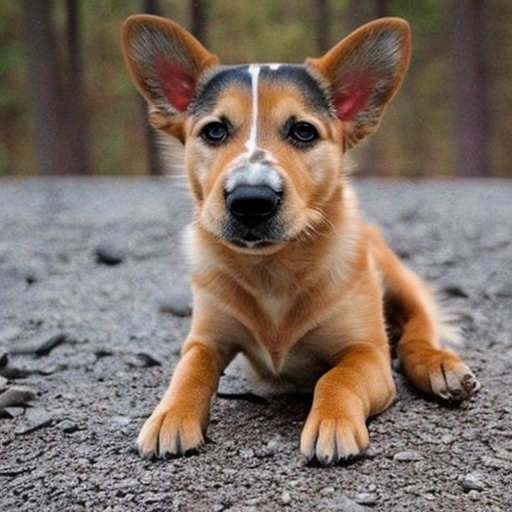

In [16]:
prompt = "A photo of a sks dog"
image = pipe(
    prompt,
    num_inference_steps=50,
    height=512,
    width=512,
).images[0]
image